Дмитрий Пустошилов

Задание 1. Модель симбиоза им. меня

dx = -r*x(1+x/K) + a*x*y
dy = -r*x(1+y/K) + a*x*y

- Найти все особые точки;
- Вычислить матрицу Якоби;
- Определить тип устойчивости всех особых точек;
- Указать, какие возможны режимы и при каком соотношении параметров наблюдается какой режим;
- Построить фазовые портреты режимов отметить особые точки;
- Провести на фазовом портрете линию, разделяющую зону размножения и зону вымирания.

In [178]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.colors import Normalize
from scipy.integrate import odeint
import numpy as np
import scipy
from numpy.linalg import eig
from scipy.optimize import minimize
import warnings
# warnings.filterwarnings("default")
warnings.filterwarnings("ignore")

In [179]:
global r, K, a
initR = 1
initK = 4
initA = 2

r = initR
K = initK
a = initA


#вид1
dx = lambda x,y: -r*x*(1+x/K) + a*x*y
#вид2
dy = lambda x,y: -r*y*(1+y/K) + a*x*y

fun = lambda p,t: [ dx(*p), dy(*p) ]

time = np.linspace(0, 300, 10000)


Инициализация стационарных точек

#вид1
dx = lambda x,y: -r*x*(1+x/K) + a*x*y
#вид2
dy = lambda x,y: -r*y*(1+y/K) + a*x*y



In [180]:
initX = [0,2,5]
initY = [0,2,5]
rMass = [0, 0.01, 0.9, 1, 3]
KMass = [0, 0.01, 0.9, 1, 3]
aMass = [0, 0.01, 0.9, 1, 3]

statPoints = []
statLines = []

# statPoint0
statPoints.append([0, 0])
# statPoint1
statPoints.append([-K, 0])
# statPoint2
statPoints.append([0, -K])
# statPoint3
statPoints.append([r*K/(r+a*K), r*K/(r+a*K)])
# statPoint4
statPoints.append([-K, -K])

# statLine
X=[];Y=[]
for x in np.linspace(0,max(initX),1000):
    y = 2*r*K/(r+a*K) - x
    if ( x >= 0 and y >= 0 ):
        X.append(x); Y.append(y)
statLines.append([X,Y])



title= '''
    -{}*x(1+y/{}) + {}*x*y
    -{}*x(1+y/{}) + {}*x*y
    
    stat0={} stat1={} stat2={}
    stat3={} stat4={}\n
    '''.format(r, K, a, r, K, a, *statPoints)

print(title)


    -1*x(1+y/4) + 2*x*y
    -1*x(1+y/4) + 2*x*y
    
    stat0=[0, 0] stat1=[-4, 0] stat2=[0, -4]
    stat3=[0.4444444444444444, 0.4444444444444444] stat4=[-4, -4]

    


Просчёт матрицы Екоби и собственных значений в точках стационаров

In [181]:
# #вид1
# dx = lambda x,y: -r*x*(1+x/K) + a*x*y
# #вид2
# dy = lambda x,y: -r*y*(1+y/K) + a*x*y
# fun = lambda p,t: [ dx(*p), dy(*p) ]

Pxx = lambda x,y: -(r*(K+2*x)/K) + a*y
Pxy = lambda x,y: a*x
Pyy = lambda x,y: -(r*(K+2*y)/K) + a*x
Pyx = lambda x,y: a*y

J = lambda p: np.array([
    [Pxx(*p), Pxy(*p)],
    [Pyx(*p), Pyy(*p)]
])

for i in range(len(statPoints)):
    print("Stationary", i, ':', statPoints[i])
    # print("Jacobian")
    # print(J(statPoints[i]))
    w,v = eig(J(statPoints[i]))
    print("Eigenvalues", w)

    if (w[0] <=0 and w[1]<=0):
      print("устойчивый узел")
    else: 
      if (w[0] <=0 or w[1]<=0):
        print("седло")
      else: 
        print("неустойчивый узел")
    print(" =============== \n")

Stationary 0 : [0, 0]
Eigenvalues [-1. -1.]
устойчивый узел

Stationary 1 : [-4, 0]
Eigenvalues [ 1. -9.]
седло

Stationary 2 : [0, -4]
Eigenvalues [ 1. -9.]
седло

Stationary 3 : [0.4444444444444444, 0.4444444444444444]
Eigenvalues [ 0.55555556 -1.22222222]
седло

Stationary 4 : [-4, -4]
Eigenvalues [  1. -15.]
седло



Отрисовка 2D проекций 

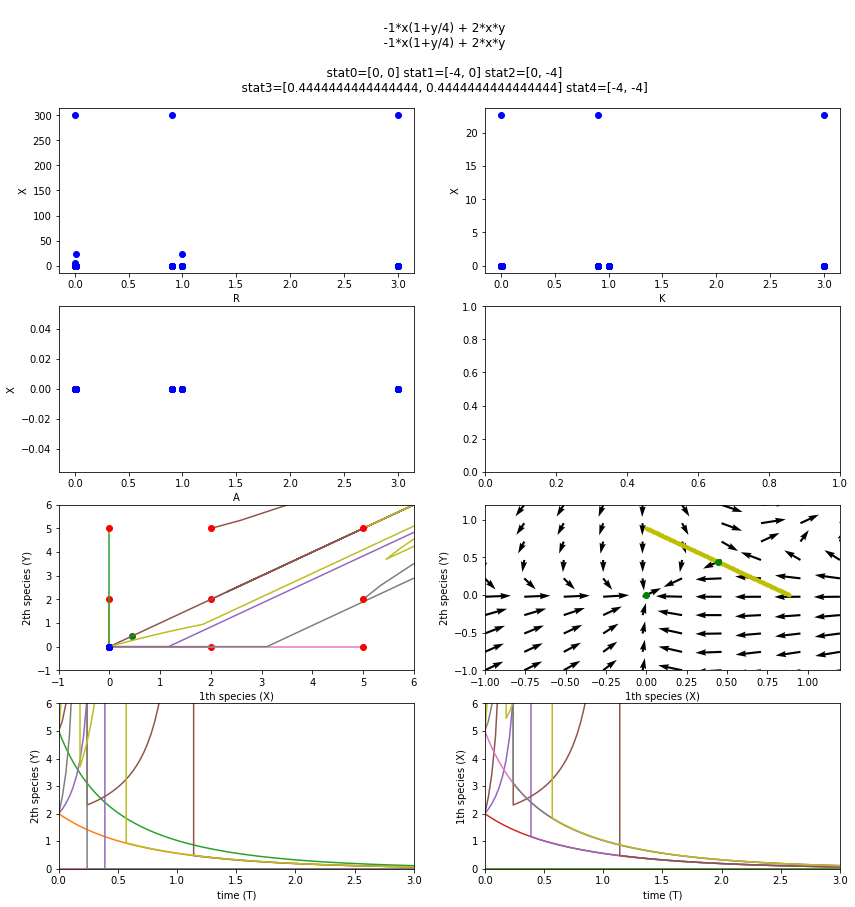

In [182]:
%matplotlib inline

def deleteNegative(mass):
    return mass[~np.any(mass < 0, axis=1)]

sizeX = max(initX) + 1
sizeY = max(initY) + 1
sizeTime = 3
sizeXquiver = sizeX / 5
sizeYquiver = sizeY / 5


fig, (
    (plotRX, plotKX),
    (plotAX, plotSave),
    (plotYX, plotYXquiver),
    (plotYT, plotXT)
) = plt.subplots(4, 2, figsize=(14,14))

fig.suptitle(title)

r=initR; K=initK; a=initA
### quivers

# Y от X quiver
Xm, Ym = np.meshgrid(np.linspace(-1,sizeXquiver,10), np.linspace(-1,sizeYquiver,10))
plotYXquiver.quiver( Xm, Ym, 
    dx(Xm,Ym)/np.sqrt(dx(Xm,Ym)**2+dy(Xm,Ym)**2), 
    dy(Xm,Ym)/np.sqrt(dx(Xm,Ym)**2+dy(Xm,Ym)**2), 
    scale_units='xy',  angles='xy')

plotYXquiver.set_xlabel('1th species (X)')
plotYXquiver.set_ylabel('2th species (Y)')  
plotYXquiver.set_xlim(-1,sizeXquiver); plotYXquiver.set_ylim(-1,sizeXquiver)


### statLines
for line in statLines:
    plotYXquiver.plot(*line,'yo',  markersize=3)

### statPoints
for cur_plot in [plotYX, plotYXquiver]: 
    for stat in statPoints:
        cur_plot.plot(stat[0], stat[1], 'go')


for X0 in initX:
    for Y0 in initY:
        r=initR; K=initK; a=initA
        result = odeint(fun, [X0, Y0], time)
        # print(result.shape)
        result_post = deleteNegative(result)
        # print(result.shape) 
        plotYX.plot(result_post[:, 0], result_post[:, 1])
        plotYX.plot(result_post[0, 0], result_post[0, 1], 'ro')
        plotYX.plot(result_post[-1, 0], result_post[-1, 1], 'bo')
        # print('start: ', result_post[0, 0], result_post[0, 1], ' end: ', result_post[-1, 0], result_post[-1, 1])

        # график X от T
        plotYT.plot(time, result[:, 1])
        plotXT.plot(time, result[:, 0])

        r=initR; K=initK; a=initA
        for _r in rMass:
            r=_r
            result = odeint(fun, [X0, Y0], time)
            result_post = deleteNegative(result)
            plotRX.plot(r, round(result_post[-1, 0],3), 'bo')
        
        r=initR; K=initK; a=initA
        for _K in KMass:
            K=_K
            result = odeint(fun, [X0, Y0], time)
            result_post = deleteNegative(result)
            plotKX.plot(K, round(result_post[-1, 0],3), 'bo')

        r=initR; K=initK; a=initA
        for _a in aMass:
            a=_a
            result = odeint(fun, [X0, Y0], time)
            result_post = deleteNegative(result)
            plotAX.plot(a, round(result_post[-1, 0],3), 'bo')

        r=initR; K=initK; a=initA




### other labels
plotRX.set_xlabel('R')
plotRX.set_ylabel('X')  

plotKX.set_xlabel('K')
plotKX.set_ylabel('X')  

plotAX.set_xlabel('A')
plotAX.set_ylabel('X')  

plotYX.set_xlabel('1th species (X)')
plotYX.set_ylabel('2th species (Y)')  
plotYX.set_xlim(-1, sizeX); plotYX.set_ylim(-1, sizeY)

plotYT.set_xlabel('time (T)')
plotYT.set_ylabel('2th species (Y)')    
plotYT.set_xlim(0, sizeTime); plotYT.set_ylim(0, sizeY)

plotXT.set_xlabel('time (T)')
plotXT.set_ylabel('1th species (X)')    
plotXT.set_xlim(0, sizeTime); plotXT.set_ylim(0, sizeX)



plt.show()


Изменение графика XY в зависимости от параметров (надо гнать в .py)

C:\Python310\lib\site-packages\matplotlib\animation.py:973: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  warnings.warn(


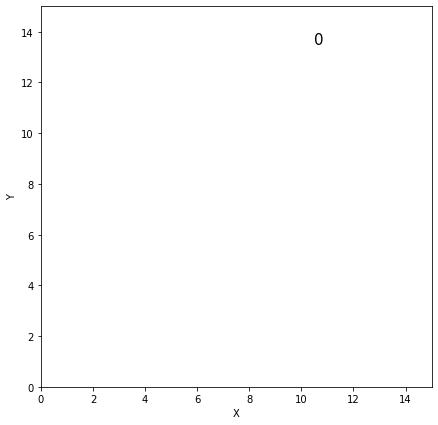

In [183]:

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.colors import Normalize
from scipy.integrate import odeint
import numpy as np
import scipy
from numpy.linalg import eig
from scipy.optimize import minimize
import warnings
warnings.filterwarnings("default")

def model(r=1, K=2, a=2):
    #вид1
    dx = lambda x,y: -r*x*(1+x/K) + a*x*y
    #вид2
    dy = lambda x,y: -r*y*(1+y/K) + a*x*y
    return lambda p,t: [ dx(*p), dy(*p) ]


initialPoints = [0,0.5,1,3,10]

fig, ax = plt.subplots(figsize=(7,7))
lines = []
for i in range(len(initialPoints)**2):
  lines.append(ax.plot([],[])[0])
text = ax.text(0.7, 0.9, '0', fontsize=15, transform = ax.transAxes)


ax.set_xlim(0, 15)
ax.set_ylim(0, 15)
ax.set_xlabel('X')
ax.set_ylabel('Y')

tt = np.linspace(0,10000, 300000)

def animate(step):
    global r
    r=1; K=1; a=1
    # r = 0 + step/10
    K = 0 + step/10
    # a = 0 + step/10

    
    for x in range(len(initialPoints)):
      for y in range(len(initialPoints)):
        fun = model(r=r, K=K, a=a)
        zz = odeint(fun, [initialPoints[x],initialPoints[y]], tt)
        lines[x*len(initialPoints)+y].set_data(zz[:, 0], zz[:, 1])
        text.set_text('r=%.2f K=%.2f a=%.2f' % (r, K, a))

    return lines, text

anim = FuncAnimation(fig, animate, frames=50, interval=500, blit = False)

plt.show()


Задание 2

- Отрисовать аттрактор;
- Найти странный режим;
- Найти нестранный режим;
- Запустить серию траекторий из случайного набора начальных условий;
- Отрисовать серию гистограмм для траекторий случайного набора для малого времени моделирования;
- Выполнить п.5 для большого времени моделирования.

In [184]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.colors import Normalize
from scipy.integrate import odeint
import numpy as np
import scipy
from numpy.linalg import eig
from scipy.optimize import minimize

import warnings
warnings.filterwarnings("ignore")

In [185]:
%matplotlib inline
def sovleAttractor(
  attractor, 
  title='attractor', 
  crop=[(-20,20),(-20,20),(-20,20)], 
  initLims=[(-20,20),(-20,20),(-10, 40)],
  time=(0,300,0.01),
  numInitPoints=30,
  T=1000):


  print("странный режим")
  fun = lambda p,t: attractor(*p)


  tt = np.arange(*time)

  initialPoints = []
  for i in range(numInitPoints):
      initialPoints.append([
        np.random.random()*(initLims[0][1]-initLims[0][0]) + initLims[0][0],
        np.random.random()*(initLims[1][1]-initLims[1][0]) + initLims[1][0], 
        np.random.random()*(initLims[2][1]-initLims[2][0]) + initLims[2][0] 
      ])


  zstore = []

  fig = plt.figure(figsize=(10,10))
  fig.suptitle(title)
  plot3D = fig.add_subplot(111, projection='3d')

  for initial in initialPoints:
      result = odeint(fun, initial, tt)
      plot3D.plot(result[:,0], result[:,1], result[:,2])
      plot3D.plot(result[0, 0], result[0, 1], result[0, 2], 'ro')
      plot3D.plot(result[-1, 0], result[-1, 1], result[-1, 2], 'bo')

      zstore.append(result[:,0])

  plot3D.set_xlim(crop[0])
  plot3D.set_ylim(crop[1])
  plot3D.set_zlim(crop[2])
  plot3D.set_xlabel('X')
  plot3D.set_ylabel('Y') 
  plot3D.set_zlabel('Z')  

  # Xm,Ym,Zm = np.meshgrid(
  #   np.linspace(0,sizeX,20),
  #   np.linspace(0,sizeY,20),
  #   np.linspace(0,sizeZ,5)
  # )

  # plotXYZ.quiver(Xm, Ym, Zm,
  #     dx(Xm,Ym,Zm), 
  #     dy(Xm,Ym,Zm), 
  #     dz(Xm,Ym,Zm), 
  #     length=sizeX/30, 
  #     normalize=True).set_alpha(0.3)

  plt.show()

  fig = plt.figure(figsize=(10,10))
  fig.suptitle(title)
  plot2D = plt.axes()

  for initial in initialPoints:
      result = odeint(fun, initial, tt)
      plot2D.plot(result[:,0], result[:,2])

  plot2D.set_xlim(crop[0])
  plot2D.set_ylim(crop[2])
  plot2D.set_xlabel('X')
  plot2D.set_ylabel('Z') 

  plt.show()

  zstore = np.array(zstore)

  #для малого Т
  fig = plt.figure(figsize=(10,10))
  fig.suptitle('T='+str(T))
  histZsmall = plt.axes()

  for i in range(zstore.shape[0]):
      e,h = np.histogramdd(zstore[i,:T], bins = 50)
      histZsmall.plot(h[0][:-1], e)
  plt.show()

  #для большого Т
  fig = plt.figure(figsize=(10,10))
  fig.suptitle('T='+str(zstore.shape[1]))
  histZbig = plt.axes()
  for i in range(zstore.shape[0]):
      e,h = np.histogramdd(zstore[i,:], bins = 50)
      histZbig.plot(h[0][:-1], e)
  plt.show()

  #условие эргодичности
  print('количество точек и предел time: ', zstore.shape)
  meanF = np.mean(zstore[:,T])
  meanT = np.mean(zstore[0,:])
  print('среднее по F: ', meanF, ' для Т=',T)
  print('среднее по time: ', meanT, ' для F0')
  print('отклонение эргодичности: ', abs(meanF-meanT))

def onlyDraw(
  attractor, 
  title='attractor', 
  crop=[(-20,20),(-20,20),(-20,20)], 
  initLims=[(-20,20),(-20,20),(-10, 40)],
  time=(0,300,0.01),
  numInitPoints=30):

  print("нестранный режим")
  fun = lambda p,t: attractor(*p)


  tt = np.arange(*time)

  initialPoints = []
  for i in range(numInitPoints):
      initialPoints.append([
        np.random.random()*(initLims[0][1]-initLims[0][0]) + initLims[0][0],
        np.random.random()*(initLims[1][1]-initLims[1][0]) + initLims[1][0], 
        np.random.random()*(initLims[2][1]-initLims[2][0]) + initLims[2][0] 
      ])


  zstore = []

  fig = plt.figure(figsize=(10,10))
  fig.suptitle(title)
  plot3D = fig.add_subplot(111, projection='3d')

  for initial in initialPoints:
      result = odeint(fun, initial, tt)
      plot3D.plot(result[:,0], result[:,1], result[:,2])
      plot3D.plot(result[0, 0], result[0, 1], result[0, 2], 'ro')
      plot3D.plot(result[-1, 0], result[-1, 1], result[-1, 2], 'bo')

      zstore.append(result[:,0])

  plot3D.set_xlim(crop[0])
  plot3D.set_ylim(crop[1])
  plot3D.set_zlim(crop[2])
  plot3D.set_xlabel('X')
  plot3D.set_ylabel('Y') 
  plot3D.set_zlabel('Z')  

  plt.show()

attractor Chen-Celikovsky

нестранный режим


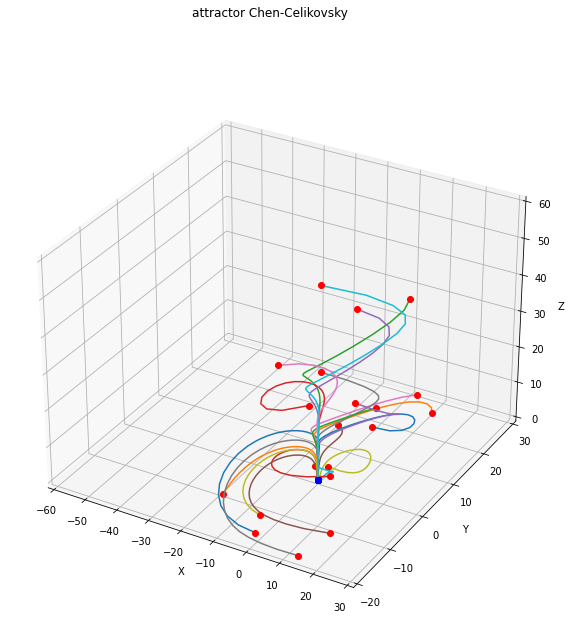

странный режим


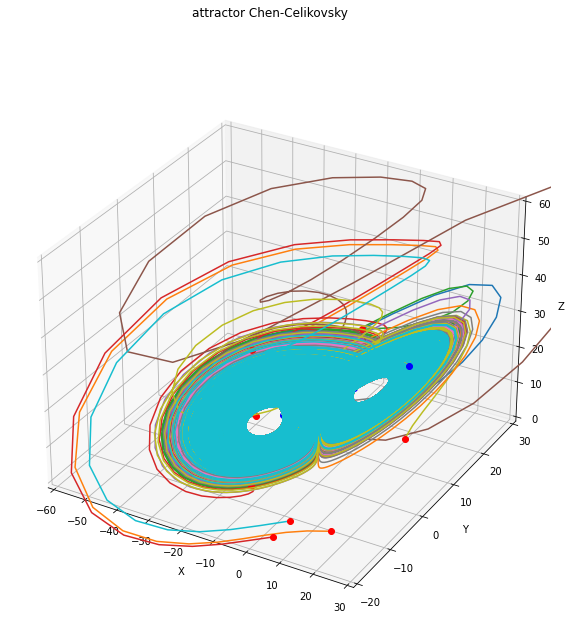

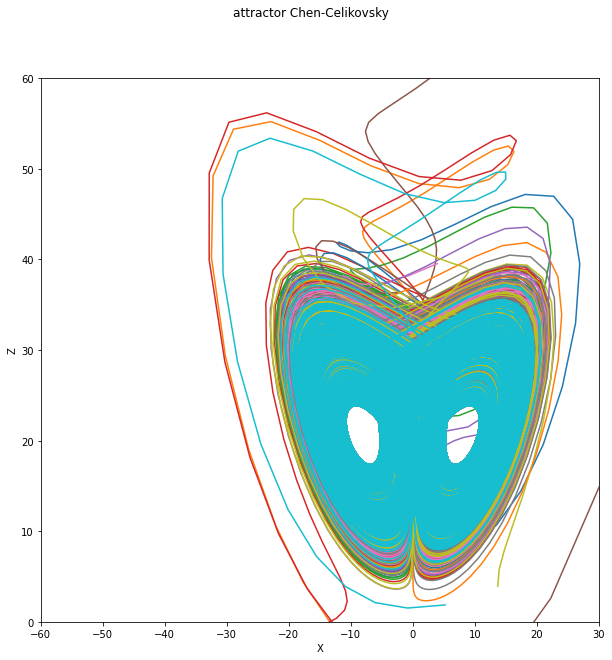

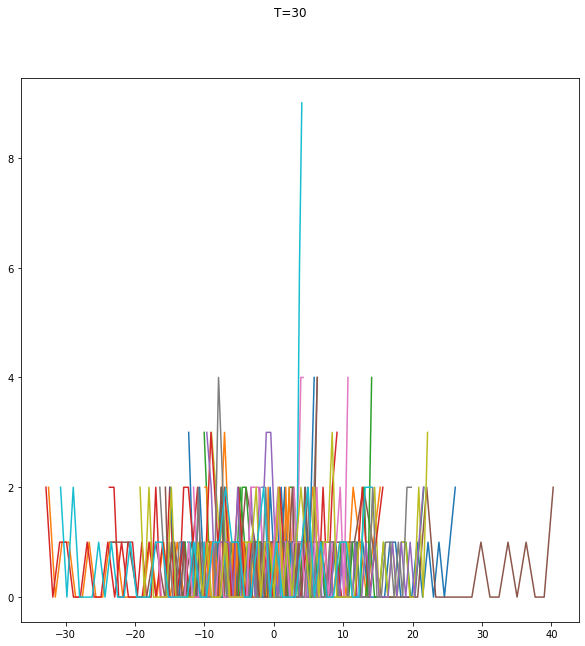

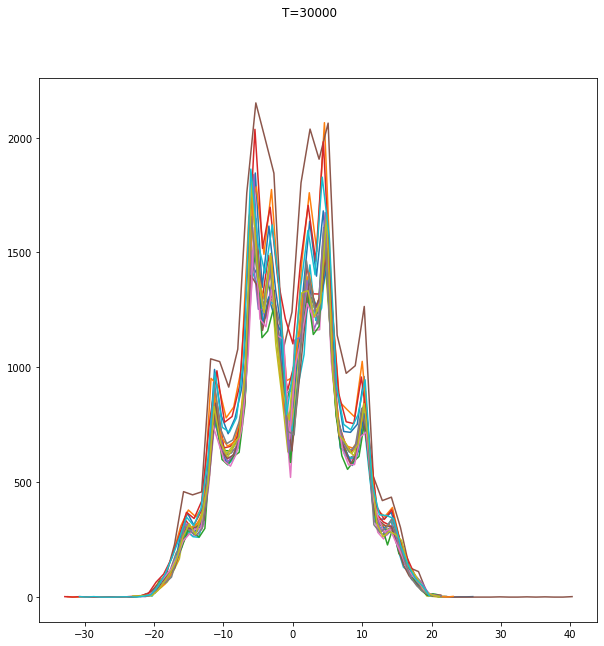

количество точек и предел time:  (20, 30000)
среднее по F:  -1.2048210731777922  для Т= 30
среднее по time:  -0.07143116112911209  для F0
отклонение эргодичности:  1.1333899120486801


In [186]:
def attractorChenCelikovsky(
  x, y, z, 
  a=36, beta=3, sigma=0):
    dx = a*(y-x)
    dy = -x*z+sigma*y
    dz = x*y-beta*z
    return dx, dy, dz

onlyDraw(
  attractorChenCelikovsky,
  title='attractor Chen-Celikovsky', 
  crop=[(-60,30),(-20,30),(0,60)],
  numInitPoints=20,
  time=(0,300,0.01)
)


def attractorChenCelikovsky(
  x, y, z, 
  a=36, beta=3, sigma=20):
    dx = a*(y-x)
    dy = -x*z+sigma*y
    dz = x*y-beta*z
    return dx, dy, dz

sovleAttractor(
  attractorChenCelikovsky, 
  title='attractor Chen-Celikovsky', 
  crop=[(-60,30),(-20,30),(0,60)],
  numInitPoints=20,
  time=(0,300,0.01),
  T=30
)

attractor Dequan Li

нестранный режим


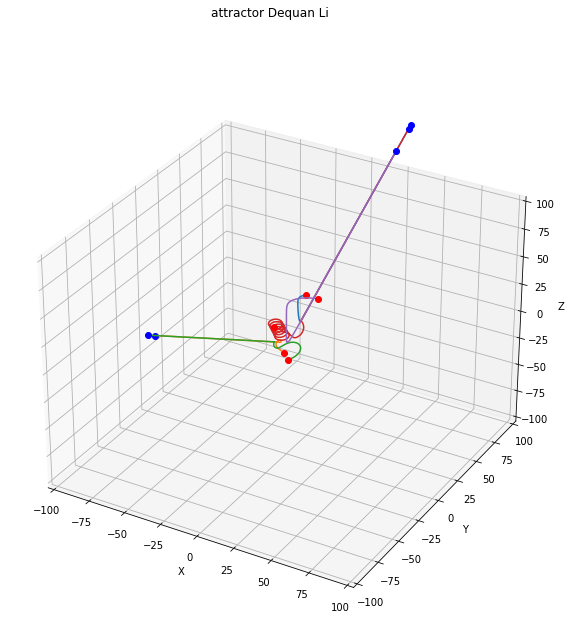

странный режим


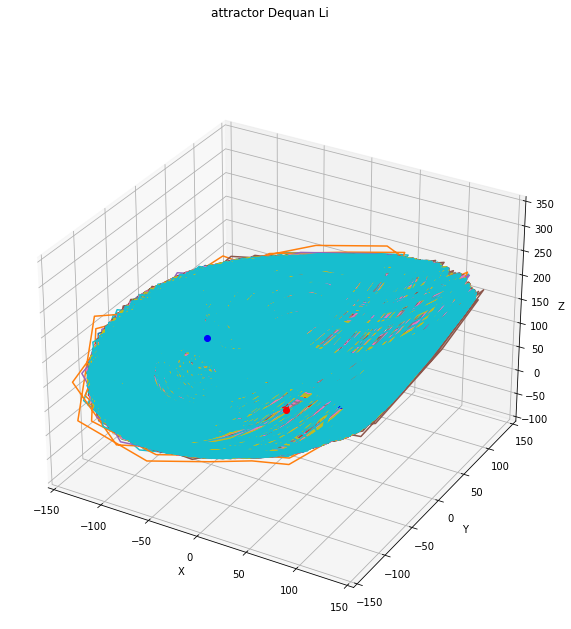

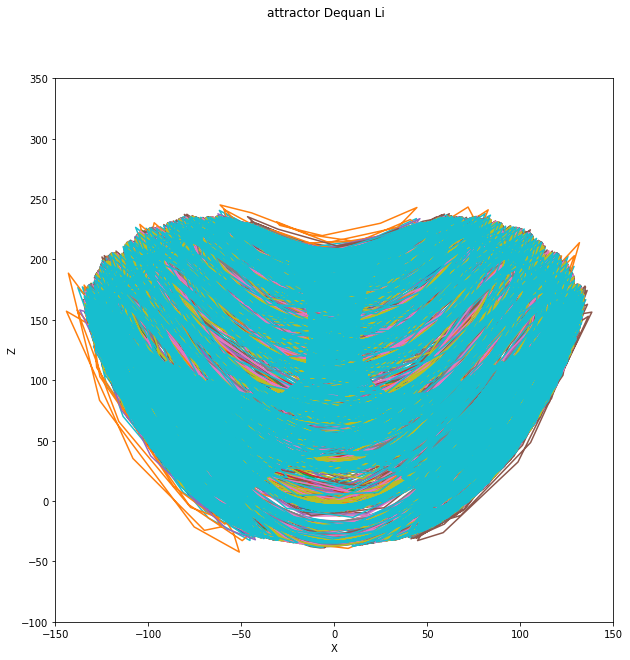

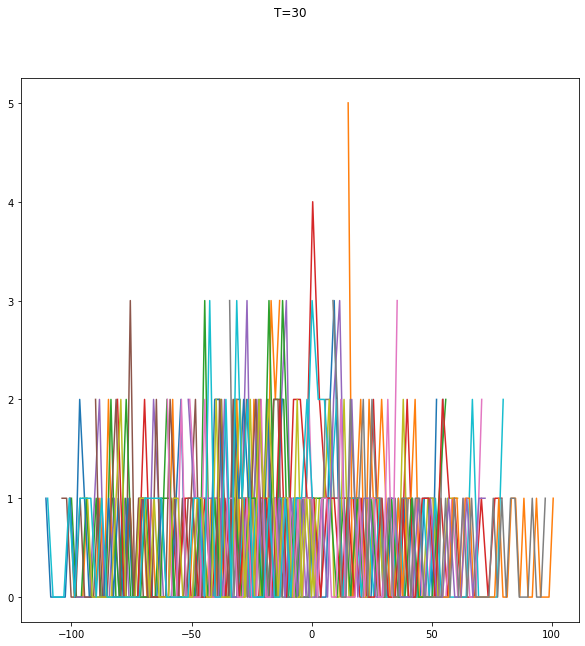

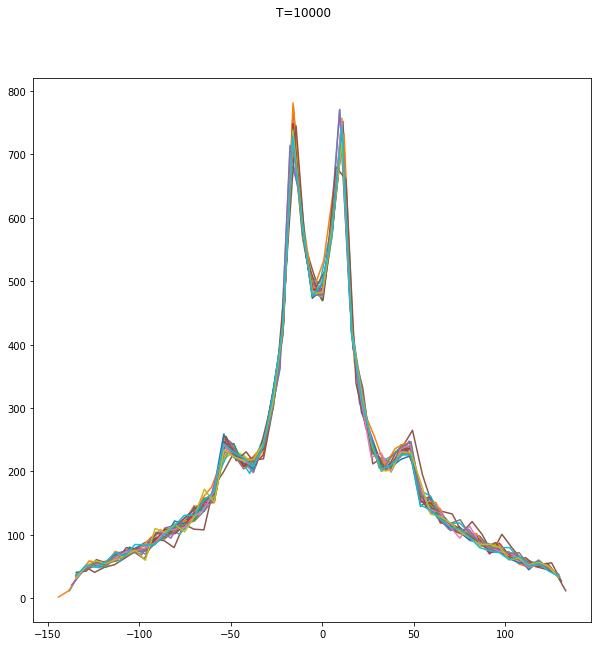

количество точек и предел time:  (20, 10000)
среднее по F:  -13.551432518473177  для Т= 30
среднее по time:  0.010918395628215194  для F0
отклонение эргодичности:  13.562350914101392


In [191]:
def attractorDequanLi(
  x, y, z, a=1, 
  beta=-2, sigma=-1, 
  e=-1, p=0, c=1):
    dx = a*(y-x)+sigma*x*z
    dy = p*x+c*y-x*z
    dz = beta*z+x*y-e*(x**2)
    return dx, dy, dz

onlyDraw(
  attractorDequanLi, 
  title='attractor Dequan Li', 
  crop=[(-100,100),(-100,100),(-100,100)],
  numInitPoints=5,
  time=(0,100,0.01)
)


def attractorDequanLi(
  x, y, z, a=40, 
  beta=1.833, sigma=0.16, 
  e=0.65, p=55, c=20):
    dx = a*(y-x)+sigma*x*z
    dy = p*x+c*y-x*z
    dz = beta*z+x*y-e*(x**2)
    return dx, dy, dz

sovleAttractor(
  attractorDequanLi, 
  title='attractor Dequan Li', 
  crop=[(-150,150),(-150,150),(-100,350)],
  numInitPoints=20,
  time=(0,100,0.01),
  T=30
)